In [1]:
# Useful Packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Tabular Playground Series - July 2022

By Michael Mortenson

The dataset for this challenge is simulated manufacturing control data. The goal is to use unsupervised (clustering) to identify different control states. We are not told the number of control states, the units, time dependencies, or any other information about the data.

## Domain Insights

Manufacturing products requires raw materials to be processed through a series of steps (and often many machines). Each step will not be perfectly exact, so the engineering design will have tolerances for the manufacture of each piece of a product. The job of manufacturing control to ensure that production stays efficient by detecting problems as machine pieces begin to wear, devices lose their calibration, or other problems arise.

Since we are not told what each column in the data represents, we will need to analyze to decide how we should treat it. 

In [2]:
# Read in data
X = pd.read_csv('/kaggle/input/tabular-playground-series-jul-2022/data.csv')

# # Uncomment to see the form of the submission
# y_ex = pd.read_csv('/kaggle/input/tabular-playground-series-jul-2022/sample_submission.csv')
# y_ex.head()

# # Uncomment individual lines for some basic info about the dataset
# X.info()
# X.describe()
# X.head()

## General Visualization

Let's take a look at the general spread of the data in each column of our dataset. Also, let's look at the samples in order to see if they appear to behave as a time series.

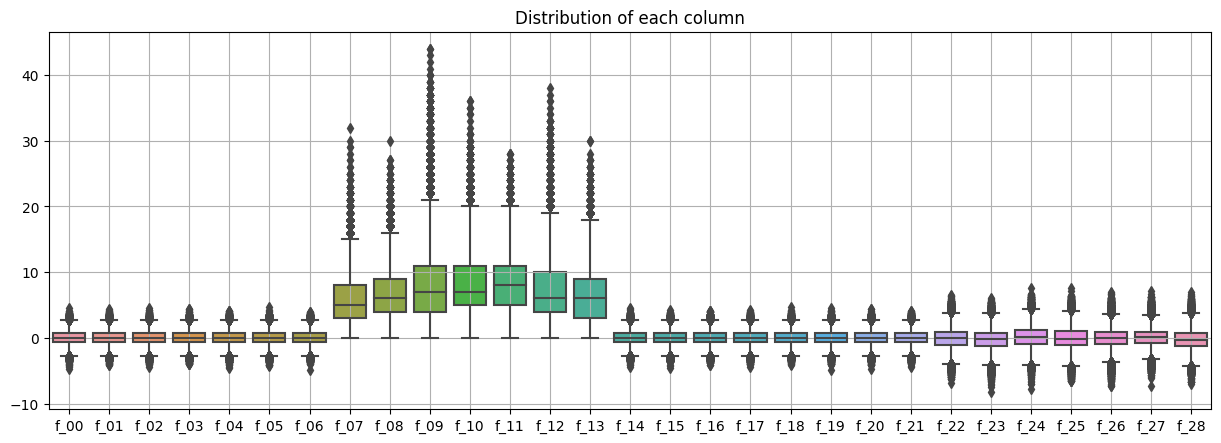

In [3]:
X1 = X.drop(columns='id').copy()
plt.figure(dpi=100, figsize=(15, 5))
sns.boxplot(data=X1)
plt.grid(True)
plt.title("Distribution of each column")
plt.show()


In [4]:
g1 = [f"f_{x:02d}" for x in range(7)]
g2 = [f"f_{x:02d}" for x in range(7, 14)]
g3 = [f"f_{x:02d}" for x in range(14, 22)]
g4 = [f"f_{x:02d}" for x in range(22, 29)]
X_g1 = X1[g1].copy()
X_g2 = X1[g2].copy()
X_g3 = X[g3].copy()
X_g4 = X1[g4].copy()

In [5]:
from sklearn.mixture import GaussianMixture

def test_gmm(data, kmax):
    bic = []
    aic = []
    for k in range(1, kmax):
        print(k)
        kmeans = GaussianMixture(n_components=k, random_state=0).fit(data)
#         data["clusters"] = kmeans.predict(data) #.labels_
        #print(data["clusters"])
        bic_k = kmeans.bic(data) 
        bic.append(bic_k)
        aic_k = kmeans.aic(data) 
        aic.append(aic_k)
        
    return bic, aic


bic, aic = test_gmm(X1, 10)

1
2
3
4
5
6
7
8
9


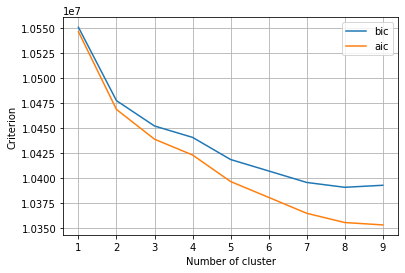

In [6]:
plt.figure()
plt.plot([x for x in range(1, len(bic)+1)], bic, label='bic')
plt.plot([x for x in range(1, len(aic)+1)], aic, label='aic')
plt.xlabel("Number of cluster")
plt.ylabel("Criterion")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
max_k = 10
bic1, aic1 = test_gmm(X_g1, max_k)
bic2, aic2 = test_gmm(X_g2, max_k)
bic3, aic3 = test_gmm(X_g3, max_k)
bic4, aic4 = test_gmm(X_g4, max_k)

1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9


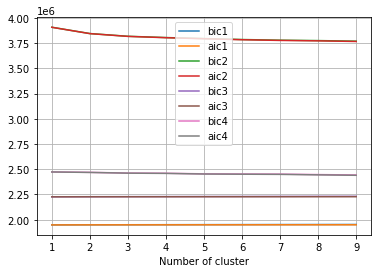

In [8]:
plt.figure()
plt.plot([x for x in range(1, len(bic1)+1)], bic1, label='bic1')
plt.plot([x for x in range(1, len(aic1)+1)], aic1, label='aic1')
plt.plot([x for x in range(1, len(bic2)+1)], bic2, label='bic2')
plt.plot([x for x in range(1, len(aic2)+1)], aic2, label='aic2')

plt.plot([x for x in range(1, len(bic3)+1)], bic3, label='bic3')
plt.plot([x for x in range(1, len(aic3)+1)], aic3, label='aic3')

plt.plot([x for x in range(1, len(bic4)+1)], bic4, label='bic4')
plt.plot([x for x in range(1, len(aic4)+1)], aic4, label='aic4')
plt.xlabel("Number of cluster")
plt.ylabel("")
plt.grid(True)
plt.legend()
plt.show()